Please fill in your name and that of your teammate.

You: Bhargav Solanki

Teammate: Carmen Sangro Prieto

# Introduction

Welcome to the eleventh lab. Deep Learning takes the already complex topic of Neural Networks and turns it up a notch. Several notches, in fact. It's hard to find exercises small enough to fit in a single assignment, let alone a *set* of exercises for all of these topics.

So this week the assignment is particularly small, with only 15 points, and should not take you as long as usual to complete. What you should do if you are interested in building Deep Learning experience instead is take one of the Bonus Questions and solve it yourself. We will support fully any question on any of the topics.

Willing to learn but unsure on the topic? Go for the **Transfer Learning** tutorial, it's the shortest and one of the most marketable skills. Basically you download a pre-trained network (on a huge dataset), cut the last (decision) layer(s), add your own (so you decide based on the last feature space), then train _only your new layer(s)_ on your specific task, which is fast and easy. While re-using the larger body that was pre-trained by someone else, likely with a larger budget.

### How to pass the lab?

Below you find the exercise questions. Each question awarding points is numbered and states the number of points like this: **[0pt]**. To answer a question, fill the cell below with your answer (markdown for text, code for implementation). Incorrect or incomplete answers are in principle worth 0 points: to assign partial reward is only up to teacher discretion. Over-complete answers do not award extra points (though they are appreciated and will be kept under consideration). Save your work frequently! (`ctrl+s`)

**You need at least 10 points (out of 15 available) to pass** (66%).

# 1. History and implementations

#### 1.1 **[1pt]** Mention 3 reasons why DL did not happen 30 years ago.

Technology 30 years ago was not up to the right standard to facilitate neural networks in order for NN and DL to work properly:

1) There was a lack of datasets available to develop and train new models and algorithms.

2) Storage of huge amounts of data (essential for DL) was not possible. It was also very expensive.

3) There didn't exist computers strong enough to process the data.

(Source: https://becominghuman.ai/what-is-deep-learning-2dd6192c1de7)

#### 1.2 **[1pt]** Explain the main pros/cons of GPU vs. CPU

A **CPU** (central processing unit) is a generalized processor that is designed to carry out a wide variety of tasks. On the contrary **GPU** (graphics processing unit) is a specialized processing unit with enhanced mathematical computation capability, ideal for computer graphics and ML tasks.

Advantages of CPUs include:

1) **Flexibility**: CPUs are flexible and resilient and can handle a variety of tasks outside of graphics processing.

2) **Precision**: CPUs can work on mid-range mathematical equations with a higher level of precision. CPUs can handle the computational depth and complexity more readily, becoming increasingly crucial for specific applications.

3) **Access to Memory**: CPUs usually contain significant local cache memory, which means they can handle a larger set of linear instructions and, hence, more complex system and computational operations.

4) **Cost and Availability**: CPUs are more readily available, more widely manufactured, and cost-effective for consumer and enterprise use. 

On the contrary, some disadvantages of CPUs are:

1) **Parallel Processing**: CPUs cannot handle parallel processing like a GPU.

2) **Compatibility**: Not every system or software is compatible with every processor.

Regarding GPUs, the main advantages are:

1) **High Data Throughput**: a GPU can push vast volumes of processed data through a workload, speeding up specific tasks beyond what a CPU can handle.

2) **Massive Parallel Computing**: GPUs excel in extensive calculations with numerous similar operations, such as computing matrices or modeling complex systems.

Finally, disadvantages of GPUs include:

1) **Multitasking**: GPUs aren’t built for multitasking, so they don’t have much impact in areas like general-purpose computing.

2) **Cost**: GPUs are still significantly more expensive than CPUs.

3) **Power and Complexity**: While a GPU can handle large amounts of parallel computing and data throughput, they struggle when the processing requirements become more chaotic. Branching logic paths, sequential operations, and other approaches to computing impede the effectiveness of a GPU.

(Source: https://www.weka.io/blog/cpu-vs-gpu/)

#### 1.3 **[1pt]** How do you implement Model Quantization? What are the advantages?

Model quantization: we store the parametrization of the model in a different format, a smaller data type, which automatically reduces the model's size. The main advantage is that, by reducing the size of the model with minimal loss, we can achieve a better performance. Also, the loading and passing around of the model on the hardware’s buses is also proportionally reduced in time.

On top of that, with model quantization, we try ro use data where possible and reduce memory consumption.

# 2. Long Short-Term Memory

#### 2.1 **[5pt]** Implement with Keras a neural network with one LSTM layer and one Dense (decision, output) layer to predict the next number in a sequence.

- Generate a dataset from a simple sequence using `gen_dataset()` below. Play with it and print it to understand how it works. Basically, it generates a sequence of multiples of ten, then prepares subsequences of fixed size `x` paired with the next number in the sequence `y`.
- Define a model using Sequential, then add an LSTM layer. You can start with 20 neurons, remember to pass `input_shape` because this is your first layer (you saw this last week with the first convolution layer).
- For a shallow network, it is better if the LSTM layer uses activations supporting regression, such as `linear` or Rectified Linear Unit ([ReLU](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/)).
- The next layer needs to squeeze the LSTM processing into a single-digit decision. How many neurons you need for this? Which activation function will you choose for the output of this regression problem?
- Next you need to compile, and for practical reasons I suggest you use the [Adam optimizer](https://keras.io/optimizers/#adam) (explained [here](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)) instead of good _old_ SGD. I use a learning rate of `1e-3` The MSE loss still works.
- Finally you can fit it. On my machine 100 epochs don't take long, and I use `verbose=0` to avoid the long output.

In [6]:
# Here's some code to get you started

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

# Let's predict data from a simple linear `y=10x` for starters
sequence = list(range(10, 500, 10))    # this will *exclude* 500
# We use a simple sliding window of size 3 and predict each 4th
test_x, test_y = [470, 480, 490], 500  # so we can use 500 for testing

# params: original data sequence, size of sliding window
def gen_dataset(sequence=sequence, win_size=len(test_x)):
    # I use a sequence of generators with different starting points
    gen_x = [sequence[start:-1] for start in range(win_size)]
    x = np.array(list(zip(*gen_x))) # then I simply zip them. Can you understand this?
    y = np.array(sequence[win_size:])
    x = x.reshape((*x.shape,1)) # Keras requires the "color channels" dimension    
    return x, y

# Let's not forget to reshape this too
print(test_x)
test_x = np.array(test_x).reshape(1,len(test_x),1)
print(test_x)

[470, 480, 490]
[[[470]
  [480]
  [490]]]


In [5]:
from keras import Input
train_x, train_y = gen_dataset()
print(train_y)
model = Sequential()
shape = test_x.shape
model.add(Input(shape=shape[1:]))
# add LSTM with 20 nuerons
model.add(LSTM(20, activation='relu'))
# Add a Dense layer with 1 units.
model.add(Dense(1,  activation="linear"))
model.compile(optimizer=Adam(learning_rate=1e-3), loss="mean_squared_error")

#fit model
history = model.fit(train_x, train_y, validation_split=0.1,
                    epochs=150, batch_size=10, verbose=0)
model.predict(test_x)

[ 40  50  60  70  80  90 100 110 120 130 140 150 160 170 180 190 200 210
 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390
 400 410 420 430 440 450 460 470 480 490]
1/1 [==============================] - 0s 92ms/step


array([[502.99747]], dtype=float32)

#### 2.2 **[3pt]** Change the model to use two LSTM layers instead of one, of 50 neurons each and ReLU activation, plus of course the output linear layer Dense. Visualize the model training progression with a metric of your choice (from [here](https://keras.io/api/metrics/regression_metrics/)).

- The first LSTM needs to pass a whole input sequence to the next one for a stack of LSTM to work, you need to use the `return_sequences` parameter.
- Again copy & paste here works well. Here are some SE rules of thumb that maybe are less obvious/known than I expected:
    - If you do something once, rough is ok.
    - If you do it twice, copy+paste is ok.
    - If you do it 3 times, it's time to write a function, the first 2 cases will tell you which parts are fixed and which parameters you need. Clean it up a bit.
    - If you call something a lot (e.g. more than 5 times), you better make it readable, refactor names, create classes, and add documentation.
    - You _never_ optimize "by eye", or just because "you know how to do it": when the program feels slow you run a profiler, and you optimize the objectively slowest part, then repeat until it's fast enough.
    - You _never_ add infrastructure because it's the right thing to do, aim at elegance and readability instead, and rather avoid using languages that require early structure or are hard to refactor. E.g. C++ you need a distructor from the beginning, Python instead you can keep writing script until you _need_ a class. Important: don't script because lazy and less work, script to make it more compact and readable, and if you need a class invest some time into designing it on paper before writing it.
- Remember that to visualize performance you need to compile with a metric, train with a validation split, and save the training history in a variable.
- Remember also that classification and regression have different metrics: you cannot use accuracy here!
- Since you have more neurons to train, and specifically one extra layer, training for more epochs is a good idea. Feel free to also generate more data if you like.
- A bigger network does not necessarily mean better results, as should be clear by now.

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt

model = Sequential()
shape = test_x.shape
model.add(Input(shape=shape[1:]))
# add LSTM with 50 nuerons
model.add(LSTM(50, activation='relu', return_sequences=True))
# add LSTM with 50 nuerons
model.add(LSTM(50, activation='relu'))
# Add a Dense layer with 1 unit.
model.add(Dense(1,  activation="linear"))
model.compile(optimizer=Adam(learning_rate=1e-3), loss="mean_squared_error")

#fit model
history = model.fit(train_x, train_y, validation_split=0.1,
                    epochs=250, batch_size=10, verbose=0)
model.predict(test_x)

array([[500.91272]], dtype=float32)

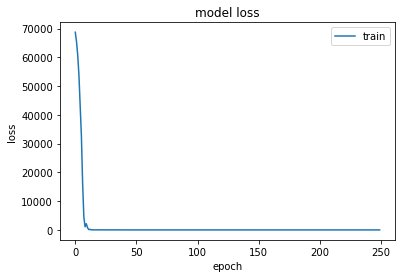

In [69]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

#### BONUS **[ZERO pt]** Change the data generated to something a bit more challenging than `y=10x`, e.g. a sinusoidal wave or another nonlinearity with more complexity. Run your code again and you should see a larger difference in performance between single and double LSTM layers. Remember that the network structure is only an upper bound for the function complexity.

# 3. Deep Convolutional Neural Networks

#### 3.1 **[2pt]** Calculate the dimension of the feature space of the third layer of LeNet-5 (16 filters, slide 22). Explain your reasoning.

- Remember it uses Valid Convolution for padding.
- The filter size is really $(5\times5\times6)$ since it takes all channels at a time.
- The number of Filters is the number of neurons.

10 x 10 x 16
Because, we have a 5 x 5 mask so for each of the 16 filters, we will have one output each of dimensions 10 x 10. How did we get 10 x 10, well take a 14 x 14 matrix and convolve witha filter of 5 x 5 and stride 1 we get a 10 x 10 x 16

#### 3.2 **[2pt]** Explain in English the results of the Microsoft Tay Twitter chatbot experiment. Propose a safer alternative experiment protocol.

There were three main problems with Microsofts Bot.
1) Garbage in garbage out :
Twitter is full of people writing garbage, insult and sometimes news and also racist and hatred messages. The bot was trained on bad information. So naturally, it spat out garbage.
2) Its a black box: 
There is no ethics or morals that decide what to keep and clearly, its not AI. It just learned what it read. 

The bot should have been subjected to have another ML model, that would judge the toxicity score of the output, before it even gave any output. The original model should try to beet toxicty threshold and the the Toxicity model, vice versa. OpenAI bots actually do that.

# 4. Generative Adversarial Networks

#### BONUS **[ZERO pt]** GANs are amazing tools and a great topic, but they are complex enough that implementing a decent example would require a lab by itself. So here is a [great tutorial](https://colab.research.google.com/github/tensorflow/gan/blob/master/tensorflow_gan/examples/colab_notebooks/tfgan_tutorial.ipynb), if you choose to play with it share your progress on Moodle and we'll support you!

# 5. Transfer Learning

If I were to only do **one** Bonus Question in the entire course, and was interested in taking a job using Deep Learning after the university, I would do this one here. It is too much work to complete to _require_ everyone to do it, but is probably the most valuable exercise in this whole assignment if you wish to do it.

Transfer Learning is easily the most useful and powerful technique to know when you first get a job that expects you to apply Deep Learning -- granted, IF you know how NNs work, as required for this course. It allows you to simply download enormous networks that have been trained on supercomputers using unbelievably large datasets, then specialize them your specific problem and use their results for free.

#### BONUS **[ZERO pt]** Follow [this tutorial](https://keras.io/guides/transfer_learning/) on Transfer Learning.

# At the end of the exercise

Bonus question with no points! Answering this will have no influence on your scoring, not at the assignment and not towards the exam score -- really feel free to ignore it with no consequence. But solving it will reward you with skills that will make the next lectures easier, give you real applications, and will be good practice towards the exam.

The solution for this questions will not be included in the regular lab solutions pdf, but you are welcome to open a discussion on the Moodle: we will support your addressing it, and you may meet other students that choose to solve this, and find a teammate for the next assignment that is willing to do things for fun and not only for score :)

#### BONUS **[ZERO pt]** You now know the basis for time series prediction using recurrent networks. Why don't you try your hand at predicting the evolution of the current COVID-19 situation? Specifically look at the Reproduction number, which is the base for the exponential growth of the infection. You can find the main data from JHU CSSE [here](https://github.com/CSSEGISandData/COVID-19), then the data for Switzerland [here](https://github.com/openZH/covid_19) (specifically Fribourg [here](https://github.com/openZH/covid_19/blob/master/fallzahlen_kanton_total_csv_v2/COVID19_Fallzahlen_Kanton_FR_total.csv)), some work from ETHZ [here](https://bsse.ethz.ch/cevo/research/sars-cov-2/real-time-monitoring-in-switzerland.html), and an example for advanced visualization [here](https://opensource.com/article/20/4/python-data-covid-19). Feel free to share your conclusions and opinions on it on the forum.

### Final considerations

- You now know how to implement LSTM networks using Keras: this allows you to tackle several Natural Language Processing tasks, which are highly marketable at this time.
- You should now have a deeper understanding of convolutions, especially on how things that appear small and easy (such as padding and striding) can lead to quite complex changes of behavior. For example, can we apply "same" padding with an filter of an even shape (e.g. 4 x 4, 6 x 6 etc.)? Would it be possible to pad the input such that, using a stride > 1, we get a matrix with the same shape as the input? This reasoning is important because these "sizes" in the network are hyperparameters, which means that you are responsible to set them correctly.